In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('Apple_Store_Reviews.csv')
data.head()

,Review_ID,App_Name,User_Age,Review_Date,Rating,Review_Text,Likes,Device_Type,Version_Used,Country,Purchase_Amount,Category
0,1,Candy Crush Saga,21,2023-01-16,4,"Great game, but too many in-game purchases.",70,iPhone 12,3.231.19,Australia,0.00,Games
1,2,Spotify,57,2024-02-01,1,"Good, but has connection issues sometimes.",49,iPhone SE,4.102.9,Germany,7.15,Music
2,3,TikTok,33,2023-11-30,5,Awesome app! Best entertainment content.,98,iPhone 12,7.52.0,Germany,4.98,Entertainment
3,4,Audible,40,2023-04-03,5,"Great app, but it's a bit pricey.",74,iPhone 13,5.260.15,Australia,0.00,Books
4,5,Spotify,44,2023-05-01,1,"Good, but has connection issues sometimes.",47,iPhone SE,4.50.18,Australia,14.31,Music


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Review_ID        1000 non-null   int64  
 1   App_Name         1000 non-null   object 
 2   User_Age         1000 non-null   int64  
 3   Review_Date      1000 non-null   object 
 4   Rating           1000 non-null   int64  
 5   Review_Text      1000 non-null   object 
 6   Likes            1000 non-null   int64  
 7   Device_Type      1000 non-null   object 
 8   Version_Used     1000 non-null   object 
 9   Country          1000 non-null   object 
 10  Purchase_Amount  1000 non-null   float64
 11  Category         1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [4]:
data.describe()

,Review_ID,User_Age,Rating,Likes,Purchase_Amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.211000,2.869000,44.776000,5.361120
std,288.819436,11.908917,1.467649,28.685444,5.755652
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,250.750000,30.000000,1.000000,17.000000,0.000000
50%,500.500000,39.000000,3.000000,42.500000,4.995000
75%,750.250000,49.000000,4.000000,71.000000,10.192500
max,1000.000000,60.000000,5.000000,100.000000,19.970000


In [5]:
data.isnull().sum()

Review_ID          0
App_Name           0
User_Age           0
Review_Date        0
Rating             0
Review_Text        0
Likes              0
Device_Type        0
Version_Used       0
Country            0
Purchase_Amount    0
Category           0
dtype: int64

In [6]:
mean = data['Rating'].mean()
print(mean)

2.869


In [7]:
median = data['Rating'].median()
print(median)

3.0


In [8]:
mode = data['Rating'].mode()[0]
print(mode)

1


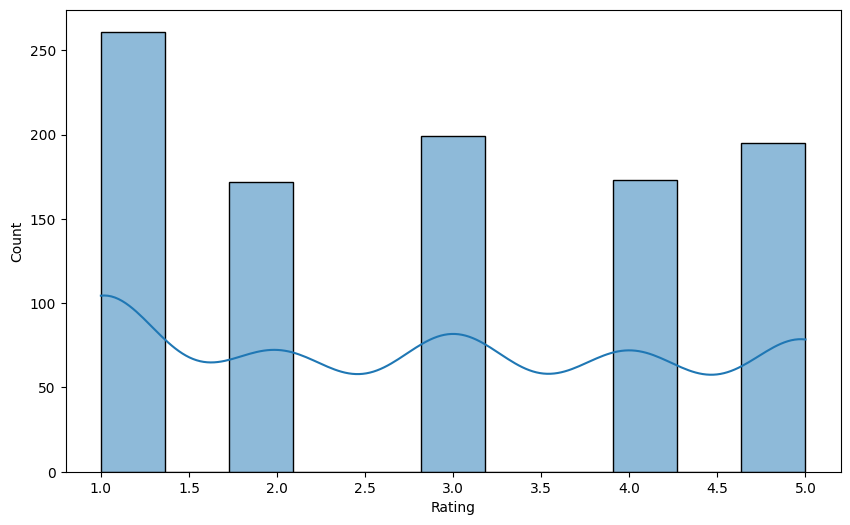

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data['Rating'], kde = True)
plt.savefig('image ratings-analysis.jpg')
plt.show()

In [14]:
purchase_amount = data['Purchase_Amount']
range_purchase_amount = purchase_amount.max() - purchase_amount.min()
print(range_purchase_amount)


19.97


In [15]:
Q1 = np.percentile(purchase_amount, 25)
Q3 = np.percentile(purchase_amount, 75)

IQR = (Q3 - Q1).round(2)
print(IQR)

10.19


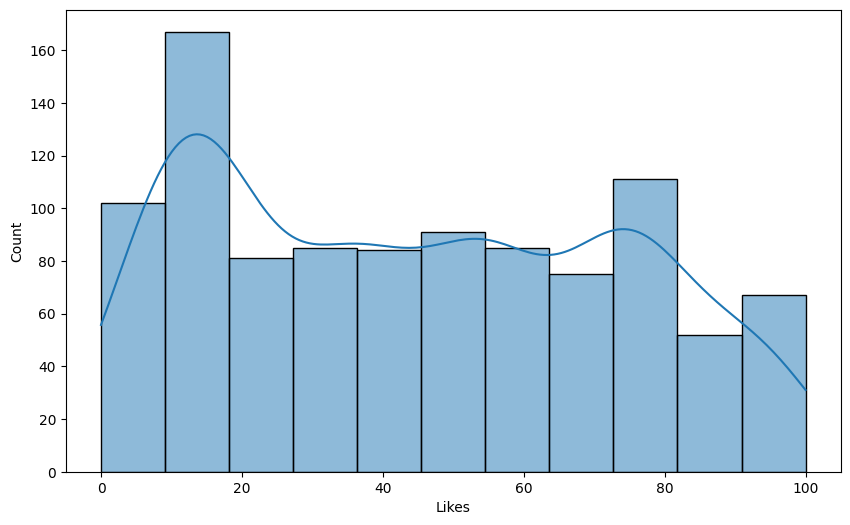

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data['Likes'], kde = True)
plt.savefig('images likes-received.jpg')
plt.show()

In [18]:
variance = data['Likes'].var().round(2)
print(variance)

822.85


In [19]:
std_dev = data['Likes'].std().round(2)
print(std_dev)

28.69


In [20]:
corr = data['Likes'].corr(data['Rating']).round(4)
print(corr)

0.8425


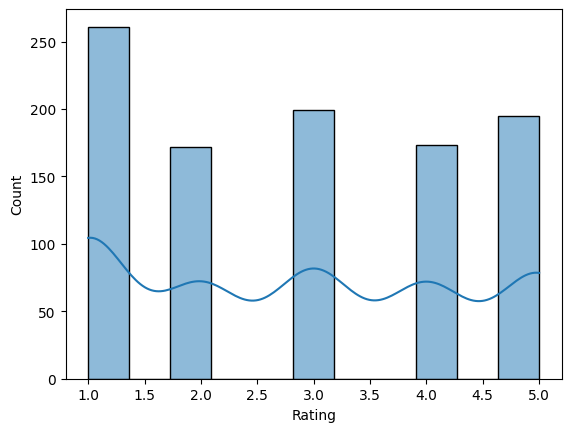

In [21]:
sns.histplot(data['Rating'], kde=True)
plt.show()

In [22]:
instagram_ratings = data[data['App_Name'] == 'Instagram']['Rating']
whatsapp_ratings = data[data['App_Name'] == 'WhatsApp']['Rating']

In [23]:
t_stat, p_value = stats.ttest_ind(instagram_ratings, whatsapp_ratings, alternative='greater')
t_stat, p_value = t_stat.round(4), p_value.round(4)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Instagram's average rating is significantly higher than WhatsApp's.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the ratings.")

T-statistic: -0.7967
P-value: 0.7868
Fail to reject the null hypothesis: No significant difference between the ratings.


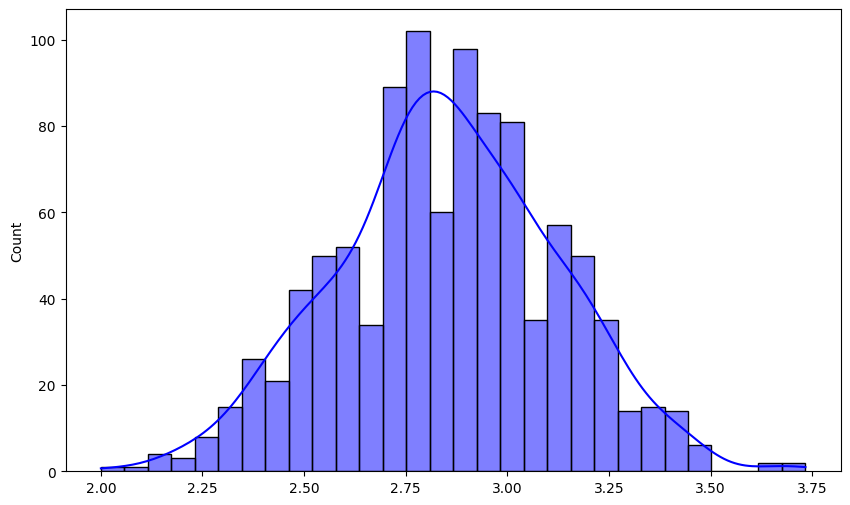

In [28]:
ratings = data['Rating']

sample_size = 30
num_samples = 1000

sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(ratings, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))
plt.figure(figsize=(10,6))
sns.histplot(sample_means, bins=30, kde=True, color='blue', edgecolor='black')
plt.savefig('images clt.jpg')
plt.show()


